### Recommendation Project

#### This project replicates a real time use case of an e-commerce company, which can recommend mobile phones to a user, which are most popular and personalized respectively. 
#### The project was accomplished by employing recommendation techniques such as popularity-based recommendation and collaborative filtering methods to recommend a mobile handset to its users based on the individual consumer’s behavior/choice

In [ ]:
#Importing useful libraries for the dataframes

In [118]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter("ignore")
from collections import defaultdict

#### 1.A: data reading and handling

In [65]:
df1= pd.read_csv("phone_user_review_file_1.csv")
print('*'*50)
print("df1 sample:")
print("Shape of dataframe: \n", df1.shape)
print(df1.head(4))
df2= pd.read_csv("phone_user_review_file_2.csv")
print('*'*50)
print("df2 sample:")
print("Shape of dataframe: \n", df2.shape)
print(df2.head(4))
df3= pd.read_csv("phone_user_review_file_3.csv")
print('*'*50)
print("df3 sample:")
print("Shape of dataframe: \n", df3.shape)
print(df3.head(4))
df4= pd.read_csv("phone_user_review_file_4.csv")
print('*'*50)
print("df4 sample:")
print("Shape of dataframe: \n", df4.shape)
print(df4.head(4))
df5= pd.read_csv("phone_user_review_file_5.csv")
print('*'*50)
print("df5 sample:")
print("Shape of dataframe: \n", df5.shape)
print(df5.head(4))
df6= pd.read_csv("phone_user_review_file_6.csv")
print('*'*50)
print("df6 sample:")
print("Shape of dataframe: \n", df6.shape)
print(df6.head(4))

**************************************************
df1 sample:
Shape of dataframe: 
 (374910, 11)
                        phone_url       date lang country            source  \
0  /cellphones/samsung-galaxy-s8/   5/2/2017   en      us  Verizon Wireless   
1  /cellphones/samsung-galaxy-s8/  4/28/2017   en      us       Phone Arena   
2  /cellphones/samsung-galaxy-s8/   5/4/2017   en      us            Amazon   
3  /cellphones/samsung-galaxy-s8/   5/2/2017   en      us           Samsung   

                domain  score  score_max  \
0  verizonwireless.com   10.0       10.0   
1       phonearena.com   10.0       10.0   
2           amazon.com    6.0       10.0   
3          samsung.com    9.2       10.0   

                                             extract       author  \
0  As a diehard Samsung fan who has had every Sam...   CarolAnn35   
1  Love the phone. the phone is sleek and smooth ...    james0923   
2  Adequate feel. Nice heft. Processor's still sl...     R. Craig   
3  Never 

### Conclusion from data groups:

    1. There are total 11 columns in all the groups
    2. we will merge all datsets into one.

In [66]:
len(df1)+len(df2)+len(df3)+len(df4)+len(df5)+len(df6)

1415133

In [67]:
raw_data= pd.concat([df1,df2,df3,df4,df5,df6], axis=0, ignore_index=True)

In [68]:
raw_data.shape

(1415133, 11)

#### 1.B: Understanding dataset

In [69]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1415133 entries, 0 to 1415132
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   phone_url  1415133 non-null  object 
 1   date       1415133 non-null  object 
 2   lang       1415133 non-null  object 
 3   country    1415133 non-null  object 
 4   source     1415133 non-null  object 
 5   domain     1415133 non-null  object 
 6   score      1351644 non-null  float64
 7   score_max  1351644 non-null  float64
 8   extract    1395772 non-null  object 
 9   author     1351931 non-null  object 
 10  product    1415132 non-null  object 
dtypes: float64(2), object(9)
memory usage: 118.8+ MB


### Conclusion:

 1. score and score_max are the numerical datatype 
 2. Both of the numerical feature columns **(score, score_max)** have equal null   
    values/missingvalues.
 3. Extract, author feature have missing values present
    

In [70]:
raw_data.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [71]:
raw_data.tail()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
1415128,/cellphones/alcatel-ot-club_1187/,5/12/2000,de,de,Ciao,ciao.de,2.0,10.0,Weil mein Onkel bei ALcatel arbeitet habe ich ...,david.paul,Alcatel Club Plus Handy
1415129,/cellphones/alcatel-ot-club_1187/,5/11/2000,de,de,Ciao,ciao.de,10.0,10.0,Hy Liebe Leserinnen und Leser!! Ich habe seit ...,Christiane14,Alcatel Club Plus Handy
1415130,/cellphones/alcatel-ot-club_1187/,5/4/2000,de,de,Ciao,ciao.de,2.0,10.0,"Jetzt hat wohl Alcatell gedacht ,sie machen wa...",michaelawr,Alcatel Club Plus Handy
1415131,/cellphones/alcatel-ot-club_1187/,5/1/2000,de,de,Ciao,ciao.de,8.0,10.0,Ich bin seit 2 Jahren (stolzer) Besitzer eines...,claudia0815,Alcatel Club Plus Handy
1415132,/cellphones/alcatel-ot-club_1187/,4/25/2000,de,de,Ciao,ciao.de,2.0,10.0,"Was sich Alkatel hier wieder ausgedacht hat,sc...",michaelawr,Alcatel Club Plus Handy


In [72]:
# checking unique values for terming categorical, ordinal and continuous features.


print("*"*50)
print("Value counts for lang feature: \n")
print(raw_data["lang"].value_counts())

print("*"*50)
print("Value counts for country feature: \n")
print(raw_data["country"].value_counts())


print("*"*50)
print("Value counts for source feature: \n")
print(raw_data["source"].value_counts())

print("*"*50)
print("Value counts for domain feature: \n")
print(raw_data["domain"].value_counts())

print("*"*50)
print("Value counts for score feature: \n")
print(raw_data["score"].value_counts())

print("*"*50)
print("Value counts for score_max feature: \n")
print(raw_data["score_max"].value_counts())


print("*"*50)
print("Value counts for author feature: \n")
print(raw_data["author"].value_counts())

print("*"*50)
print("Value counts for product feature: \n")
print(raw_data["product"].value_counts())






**************************************************
Value counts for lang feature: 

en    554746
ru    207443
de    176600
it    116120
es     99739
fr     95080
pt     67155
nl     38375
tr     28359
sv     17149
fi      6953
cs      2533
no      1918
he      1370
pl       493
da       418
hu       346
id       271
ja        33
zh        19
ar        12
ko         1
Name: lang, dtype: int64
**************************************************
Value counts for country feature: 

us    318435
de    176525
ru    174945
in    127876
it    116120
gb     95795
fr     95080
es     76271
br     63975
ua     32498
tr     28359
nl     25716
se     17149
ar     15636
be     12659
ca     11118
fi      6953
pt      3180
mx      3142
cz      2533
no      1918
ec      1478
au      1413
il      1370
co      1350
uy       725
cl       603
pl       493
dk       418
ve       389
hu       346
id       271
pe       145
ch        75
nz        74
jp        33
za        25
tw        14
ae        12
sg        1

In [73]:
raw_data.describe().T

,count,mean,std,min,25%,50%,75%,max
score,1351644.0,8.00706,2.616121,0.2,7.2,9.2,10.0,10.0
score_max,1351644.0,10.00000,0.000000,10.0,10.0,10.0,10.0,10.0


#### 1.C: rounding of score to nearest integers

In [75]:
# first we check minimum and maximum ratings of the score

print("Maximum score given by author is : ", raw_data['score'].max(), "\n")

print("Minimum score given by author is : ", raw_data['score'].min(),"\n")


Maximum score given by author is :  10.0 

Minimum score given by author is :  0.2 



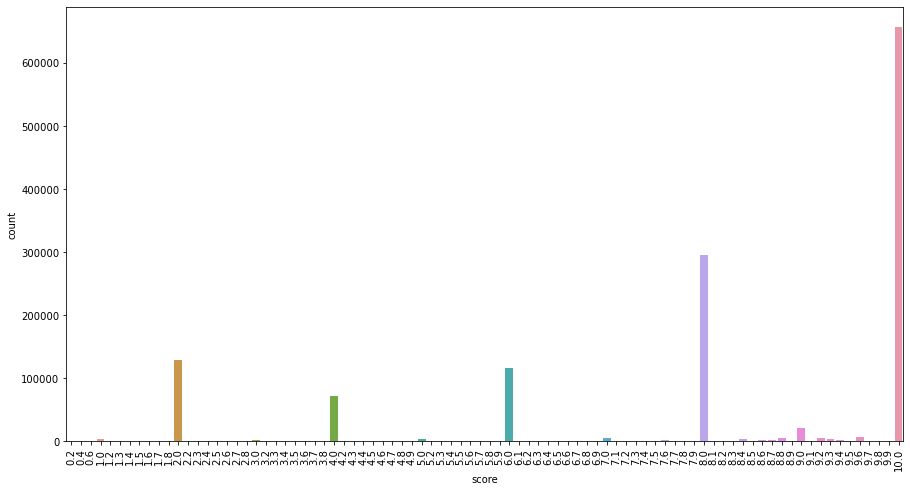

In [76]:
plt.figure(figsize=[15,8])
plt.xticks(rotation=90)

sns.countplot(raw_data["score"])
plt.show()

### Conclusion after plotting:

    1.  Majority of the scores are **2.0, 4.0, 6.0, 8.0, 10.0** (Integer)
    2.  A few of the scores are in continuous number(with decimals)
    3.  We will convert them to nearest integer number.

In [77]:
raw_data['score']=round(raw_data['score'])

In [78]:
raw_data['score'].unique()

array([10.,  6.,  9.,  4.,  8.,  2.,  7.,  5., nan,  3.,  1.,  0.])

#### Inference: 

    * All the values in score feature rounded off to nearest integer.
    
    * There are some nan values in the feature column.
    

#### 1.D:  Checking for missing values

In [ ]:
raw_data.isnull().sum()

In [80]:
raw_data['score'].fillna(raw_data['score'].median(), inplace=True)
raw_data['score_max'].fillna('10', inplace=True) # Maximum score is 10

In [81]:
raw_data.isnull().sum()

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score            0
score_max        0
extract      19361
author       63202
product          1
dtype: int64

In [82]:
# since extract and author is multi discrete variable , we will drop all the null values.

data= raw_data.dropna()

In [83]:
data.isnull().sum()

phone_url    0
date         0
lang         0
country      0
source       0
domain       0
score        0
score_max    0
extract      0
author       0
product      0
dtype: int64

In [84]:
data['score'].value_counts()

10.0    630055
8.0     287457
2.0     123334
6.0     110422
9.0      99112
4.0      68165
7.0       8311
5.0       4392
1.0       2791
3.0       2335
0.0         42
Name: score, dtype: int64

#### 1.E:  Checking for duplicates

In [85]:
data.duplicated().sum()

4823

In [86]:
data.drop_duplicates(inplace=True)

In [87]:
data.shape

(1331593, 11)

#### 1.F: final shape of data

In [88]:
final_data=data.sample(n=1000000, random_state=612)
final_data.reset_index(inplace=True)

In [89]:
final_data.shape

(1000000, 12)

In [90]:
# checking columns 

final_data.columns

Index(['index', 'phone_url', 'date', 'lang', 'country', 'source', 'domain',
       'score', 'score_max', 'extract', 'author', 'product'],
      dtype='object')

In [92]:
final_data.head()

,index,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,8765,/cellphones/samsung-galaxy-s7-edge/,5/23/2016,en,us,Samsung,samsung.com,10.0,10.0,I love this phone. Very fast no problems since...,Kdotj15,Samsung Galaxy S7 edge 32GB (Sprint)
1,233365,/cellphones/asus-zenfone-2-ze551ml/,2/20/2017,it,it,Amazon,amazon.it,10.0,10.0,"Qualità prezzo davvero ottimo, rispetto ai più...",Cliente Amazon,Asus ZE551ML-2A760WW Smartphone ZenFone 2 Delu...
2,145859,/cellphones/huawei-mate-s/,1/14/2017,he,il,Zap.il,zap.co.il,10.0,10.0,קניתי את המכשיר ב1500 ש:ח באוקטובר האחרון (201...,ron,טלפון סלולרי Huawei Mate S 32GB
3,1203260,/cellphones/sony-ericsson-w395/,5/28/2009,de,de,Amazon,amazon.de,8.0,10.0,Ich habe dieses Handy am 30.3. bei amazon erwo...,katha_maria93,Sony Ericsson W395 blush titanium Handy
4,1205666,/cellphones/apple-iphone-3g/,2/6/2009,en,gb,Amazon,amazon.co.uk,2.0,10.0,There not unock t to any network and not engli...,paul george,Apple iPhone 3G 8GB SIM-Free - Black


#### 1.G: droping irrelevant features

In [93]:
# By inspection, domain and source are similar , so we drop any one column from them. 
# also maximum score is 10 which is unique for all the values . so we drop score_max also.
# index column is not required 
# WE keep author, score and product features only as suggested in problem statement. 

In [94]:
final=final_data[['author', 'product','score']]

In [95]:
final.shape

(1000000, 3)

In [96]:
final.head()

,author,product,score
0,Kdotj15,Samsung Galaxy S7 edge 32GB (Sprint),10.0
1,Cliente Amazon,Asus ZE551ML-2A760WW Smartphone ZenFone 2 Delu...,10.0
2,ron,טלפון סלולרי Huawei Mate S 32GB,10.0
3,katha_maria93,Sony Ericsson W395 blush titanium Handy,8.0
4,paul george,Apple iPhone 3G 8GB SIM-Free - Black,2.0


### 2.A: Most Rated Products 

 Most rated products:
 Lenovo Vibe K4 Note (White,16GB)                3913
Lenovo Vibe K4 Note (Black, 16GB)               3228
OnePlus 3 (Graphite, 64 GB)                     3127
OnePlus 3 (Soft Gold, 64 GB)                    2643
Huawei P8lite zwart / 16 GB                     1994
Samsung Galaxy Express I8730                    1982
Lenovo Vibe K5 (Gold, VoLTE update)             1865
Samsung Galaxy S6 zwart / 32 GB                 1729
Lenovo Vibe K5 (Grey, VoLTE update)             1596
Lenovo Used Lenovo Zuk Z1 (Space Grey, 64GB)    1453
Name: product, dtype: int64


<AxesSubplot:ylabel='product'>

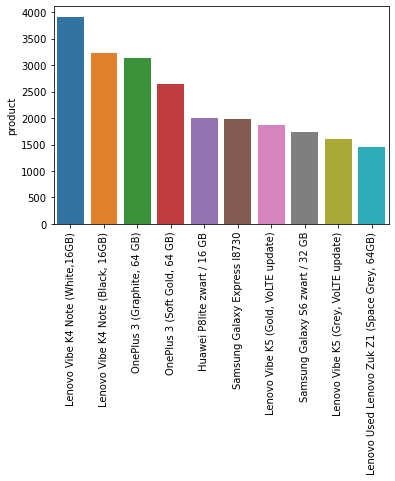

In [97]:
# Most rated products on the basis of number of reviews 

most_rated= final['product'].value_counts().head(10)
print(" Most rated products:\n", most_rated)
plt.xticks(rotation=90)
sns.barplot(y=most_rated ,x=most_rated.index)

### 2.B:  Users with Most number of reviews

In [98]:
most_reviews= final['author'].value_counts().head(5)
print("Users with most number of reviews: \n",most_reviews)

Users with most number of reviews: 
 Amazon Customer    57801
Cliente Amazon     14656
e-bit               6260
Client d'Amazon     5715
Amazon Kunde        3563
Name: author, dtype: int64


<AxesSubplot:ylabel='author'>

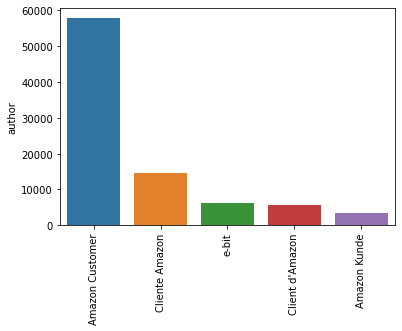

In [99]:
plt.xticks(rotation=90)
sns.barplot(y=most_reviews ,x=most_reviews.index)

#### 2.C: Dataset with products rated more than 50 times & users rated more than 50 times

In [100]:
users= final['author'].value_counts()
products= final['product'].value_counts()

# list of authors who have rated  more than 50 times 
users_50=users[users>50].index.tolist()

# list of products which are rated more than 50 times

products_50=products[products>50].index.tolist()

print("Number of authors who have given more than 50 ratings:", len(users_50))
print("Number of products which have been rated more than 50 times :", len(products_50))

Number of authors who have given more than 50 ratings: 690
Number of products which have been rated more than 50 times : 4376


In [101]:
final_dataset= final[(final['author'].isin(users_50))&(final['product'].isin(products_50))]
print("Shape of dataset is:", final_dataset.shape)

Shape of dataset is: (109237, 3)


In [102]:
final_dataset.head()

,author,product,score
1,Cliente Amazon,Asus ZE551ML-2A760WW Smartphone ZenFone 2 Delu...,10.0
15,Amazon Customer,"Apple iPhone 5s (Silver, 16GB)",2.0
19,einem Kunden,"ZTE Blade A452 Smartphone, 12,7 cm (5 Zoll) Di...",10.0
30,Client d'Amazon,Aukru Chargeur de batterie adaptateur Pour Sam...,8.0
43,Amazon Customer,"Motorola Moto G 3rd Generation (Black, 16GB)",8.0


### 3. Popularity Based model 

In [103]:
# building a function for popularity based model 

def popular_model(dataframe):
    ratings_mean_count = pd.DataFrame(dataframe.groupby('product')['score'].mean())
    ratings_mean_count['score_counts'] = pd.DataFrame(dataframe.groupby('product')['score'].count())
    ratings_mean_count = ratings_mean_count.sort_values(by=['score','score_counts'], ascending=[False,False])
    print('Top 5 recommendations for the mobile products are: \n')
    display(ratings_mean_count.head())
    return

In [104]:
# TOP 5 Mobile phones are:

popular_model(final_dataset)

Top 5 recommendations for the mobile products are: 



,score,score_counts
product,,
Samsung Galaxy Note5,10.0,56
Samsung Galaxy S7 Edge 32Gb,10.0,13
Sim Free Apple iPhone SE 64GB Mobile Phone - Space Grey,10.0,12
Sony Smartphone Sony Xperia L Preto Android 4.1 3G Câmera 8MP 8GB NFC,10.0,12
BlackBerry OEM Z10 Black Leather Swivel Holster,10.0,9


### 4. Collaborative Filtering Model using SVD:

In [105]:
# Importing surprise library 

from surprise import KNNWithMeans
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import GridSearchCV, cross_validate
from surprise import KNNWithMeans
from surprise.model_selection import train_test_split

In [106]:
# Assigning reader score ratings
reader = Reader(rating_scale = (0,10)) 

# Reading data from dataset
data = Dataset.load_from_df(final_dataset[["author","product","score"]], reader=reader)

#Spliting data into train & test set
trainset, testset = train_test_split(data, test_size=0.25,random_state=612)

In [107]:
# Train data
svd = SVD()
svd.fit(trainset)

# Test data
test_pred = svd.test(testset)

# Few Pedictions on test data
test_pred[0:5]

[Prediction(uid='jose', iid='BlackBerry Q10 Unlocked Cellphone, 16GB, Black', r_ui=10.0, est=8.216460208691256, details={'was_impossible': False}),
 Prediction(uid='e-bit', iid='Smartphone Samsung Galaxy Gran Prime SM-G531', r_ui=10.0, est=8.57841396232113, details={'was_impossible': False}),
 Prediction(uid='Cliente de Amazon', iid='Huawei Ascend Y330 - Smartphone libre Android (pantalla 4", cámara 3.15 Mp, 4 GB, Dual-Core 1.3 GHz, 512 MB de RAM), color blanco', r_ui=8.0, est=8.170717113563908, details={'was_impossible': False}),
 Prediction(uid='Cliente Amazon', iid='Huawei P8 lite Smartphone, Display 5.0" IPS, Dual Sim, Processore Octa-Core, Memoria 16 GB, Fotocamera 13 MP, Android 5.0, Bianco', r_ui=2.0, est=8.10274463304443, details={'was_impossible': False}),
 Prediction(uid='e-bit', iid='Smartphone Asus ZenFone 3 ZE520KL', r_ui=8.0, est=9.404698832630825, details={'was_impossible': False})]

In [108]:
# compute RMSE for SVD 

accuracy.rmse(test_pred)

RMSE: 2.6578


2.657793413866978

### KNNWithMeans 

In [109]:
#KNN with item based 

algo = KNNWithMeans(k=50, sim_options={ 'name': 'pearson_baseline','user_based': False})

algo.fit(trainset)


Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [110]:
test_pred_item=algo.test(testset)
print(accuracy.rmse(test_pred_item))

RMSE: 2.6949
2.6949342638623968


In [111]:
test_pred_item[:5]

[Prediction(uid='jose', iid='BlackBerry Q10 Unlocked Cellphone, 16GB, Black', r_ui=10.0, est=7.286541330950005, details={'actual_k': 13, 'was_impossible': False}),
 Prediction(uid='e-bit', iid='Smartphone Samsung Galaxy Gran Prime SM-G531', r_ui=10.0, est=8.32, details={'actual_k': 50, 'was_impossible': False}),
 Prediction(uid='Cliente de Amazon', iid='Huawei Ascend Y330 - Smartphone libre Android (pantalla 4", cámara 3.15 Mp, 4 GB, Dual-Core 1.3 GHz, 512 MB de RAM), color blanco', r_ui=8.0, est=9.080415090525342, details={'actual_k': 8, 'was_impossible': False}),
 Prediction(uid='Cliente Amazon', iid='Huawei P8 lite Smartphone, Display 5.0" IPS, Dual Sim, Processore Octa-Core, Memoria 16 GB, Fotocamera 13 MP, Android 5.0, Bianco', r_ui=2.0, est=8.84, details={'actual_k': 50, 'was_impossible': False}),
 Prediction(uid='e-bit', iid='Smartphone Asus ZenFone 3 ZE520KL', r_ui=8.0, est=9.4, details={'actual_k': 50, 'was_impossible': False})]

In [112]:
#KNN with User based 

algo_user = KNNWithMeans(k=50, sim_options={ 'name': 'pearson_baseline','user_based': True})

algo_user.fit(trainset)

test_pred_user=algo_user.test(testset)

test_pred_user[:5]



Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


[Prediction(uid='jose', iid='BlackBerry Q10 Unlocked Cellphone, 16GB, Black', r_ui=10.0, est=7.086846218307952, details={'actual_k': 15, 'was_impossible': False}),
 Prediction(uid='e-bit', iid='Smartphone Samsung Galaxy Gran Prime SM-G531', r_ui=10.0, est=8.32, details={'actual_k': 50, 'was_impossible': False}),
 Prediction(uid='Cliente de Amazon', iid='Huawei Ascend Y330 - Smartphone libre Android (pantalla 4", cámara 3.15 Mp, 4 GB, Dual-Core 1.3 GHz, 512 MB de RAM), color blanco', r_ui=8.0, est=9.214304461595969, details={'actual_k': 3, 'was_impossible': False}),
 Prediction(uid='Cliente Amazon', iid='Huawei P8 lite Smartphone, Display 5.0" IPS, Dual Sim, Processore Octa-Core, Memoria 16 GB, Fotocamera 13 MP, Android 5.0, Bianco', r_ui=2.0, est=8.84, details={'actual_k': 50, 'was_impossible': False}),
 Prediction(uid='e-bit', iid='Smartphone Asus ZenFone 3 ZE520KL', r_ui=8.0, est=9.4, details={'actual_k': 50, 'was_impossible': False})]

In [113]:
print(accuracy.rmse(test_pred_user))

RMSE: 2.7448
2.7448336079284075


### 5. Evaluation of collaborative model 

In [114]:
print('RMSE of SVD:', accuracy.rmse(test_pred))
print("*"*50)

print('RMSE of item based:', accuracy.rmse(test_pred_item))
print("*"*50)

print('RMSE of user based:', accuracy.rmse(test_pred_user))
print("*"*50)


RMSE: 2.6578
RMSE of SVD: 2.657793413866978
**************************************************
RMSE: 2.6949
RMSE of item based: 2.6949342638623968
**************************************************
RMSE: 2.7448
RMSE of user based: 2.7448336079284075
**************************************************


### 6. Predicting average ratings for test users:

In [115]:
# for SVD

SVD_pred=pd.DataFrame(test_pred, columns=['uid', 'iid', 'rui', 'est', 'details'])
print('Average prediction for test users: ',SVD_pred['est'].mean(),"\n")
print('Actual average rating by test users: ',SVD_pred['rui'].mean(),'\n')
print('Average prediction error for test users: ',(SVD_pred['rui']-SVD_pred['est']).abs().mean(),'\n')


Average prediction for test users:  7.836422548525929 

Actual average rating by test users:  7.859318930794581 

Average prediction error for test users:  2.061741775914227 



In [116]:
# For KNNWithMeans item based

pred_knn_i=pd.DataFrame(test_pred_item, columns=['uid', 'iid', 'rui', 'est', 'details'])

print('Average prediction for test users: ',pred_knn_i['est'].mean(),'\n')

print('Actual average rating by test users: ',pred_knn_i['rui'].mean(),'\n')

print('Average prediction error for test users: ',(pred_knn_i['rui']-pred_knn_i['est']).abs().mean(),'\n')

Average prediction for test users:  7.849716675278045 

Actual average rating by test users:  7.859318930794581 

Average prediction error for test users:  2.0649279527375892 



In [117]:
# For KNNWithMeans User based

pred_knn_u=pd.DataFrame(test_pred_user, columns=['uid', 'iid', 'rui', 'est', 'details'])

print('Average prediction for test users: ',pred_knn_u['est'].mean(),"\n")

print('Actual average rating by test users: ',pred_knn_u['rui'].mean(),"\n")

print('Average prediction error for test users: ',(pred_knn_u['rui']-pred_knn_u['est']).abs().mean(),"\n")

Average prediction for test users:  7.8736788218986895 

Actual average rating by test users:  7.859318930794581 

Average prediction error for test users:  2.072403975302977 



#### 7. Inferences and Findings:

1. By popularity based recommendation system, Samsung galaxy note 5 is the most rated product.
2. SVD method gives low value of RMSE 2.65 among KNNWithMeans item and user based model.
3. Average prediction error for test users are almost same for all the 3 models.


#### 8. Recommending top 5 products for test users

In [119]:
def top_five(recommendation, n):9
    
    # Mapping the predictions to each user
    
    top_five = defaultdict(list)
    for uid, iid, true_r, est, _ in recommendation:
        top_five[uid].append((iid, est))

    # sorting the predictions and returning n highest ratings one
    
    for uid, user_ratings in top_five.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_five[uid] = user_ratings[:n]

    return top_five

In [120]:
# SVD recommendations

top_five = top_five(test_pred,5)

print('Top 5 recommendations for all test users are: \n')

for key,value in top_five.items(): print(key,'::: ',value,'\n')

Top 5 recommendations for all test users are: 

jose :::  [('Samsung ATIV S (i8750) - Smartphone libre Windows Phone (pantalla 4.8", cámara 8 Mp, 16 GB, Dual-Core 1.5 GHz, 1 GB RAM), plateado', 9.592221527777792), ('Samsung Galaxy S7 Edge - Smartphone libre Android (5.5", Bluetooth v4.2, 4 GB de RAM, 32 GB, 12 MP), color dorado', 8.853063145038561), ('BQ Aquaris E5 HD - Smartphone libre Android (pantalla 5 pulgadas, cámara 13 Mp, 16 GB, Quad-Core 1.3 GHz, 1 GB RAM), blanco y negro', 8.72591543668581), ('LG Nexus 5X LG-H791 32GB Factory Unlocked UK/EU Smartphone - Quartz White - International Version No warranty', 8.682160358314757), ('LG Nexus 5X - Smartphone libre Android (pantalla 5.2", cámara 12.3 MP, 2 GB de RAM, 16 GB), color negro', 8.601589898856318)] 

e-bit :::  [('Smartphone Samsung Galaxy S6 Edge SM-G925 32GB', 9.896463147607884), ('Smartphone Samsung Galaxy S6 Edge SM-G925 32GB', 9.896463147607884), ('Smartphone Samsung Galaxy S6 Edge SM-G925 32GB', 9.896463147607884), ('Sm

Elena :::  [("Huawei P9 Lite Smartphone, LTE, Display 5.2'' FHD, Processore Octa-Core Kirin 650, 16 GB Memoria Interna, 3GB RAM, Fotocamera 13 MP, Single-SIM, Android 6.0 Marshmallow, Nero [Italia]", 10), ('Asus ZenFone 2 Laser Smartphone, Display da 5", 16 GB, Dual SIM, Nero [Italia]', 10), ('Samsung Galaxy J5 Smartphone, Oro [Italia]', 9.745352935015427), ('Sony Xperia P - Smartphone libre (pantalla t??ctil de 4" 540 x 960, c??mara 8 Mp, 16 GB, 2 procesadores de 1 GHz, 1 GB de RAM, S.O. Android 2.3), negro', 9.390796212873852), ('Sony Xperia L (белый)', 9.18201474422161)] 

Silvia :::  [('Huawei P8 Lite Smartphone, Display 5" IPS, Processore Octa-Core 1.5 GHz, Memoria Interna da 16 GB, 2 GB RAM, Fotocamera 13 MP, monoSIM, Android 5.0, Bianco [Italia]', 8.88100708833607), ('Huawei P8 Lite Smartphone, Display 5" IPS, Processore Octa-Core 1.5 GHz, Memoria Interna da 16 GB, 2 GB RAM, Fotocamera 13 MP, monoSIM, Android 5.0, Bianco [Italia]', 8.88100708833607), ('Microsoft Lumia 950 Smartp

Bob :::  [('Huawei Mate 9 with Amazon Alexa and Leica Dual Camera - 64GB Unlocked Phone - Space Gray (US Warranty)', 8.497641173588637), ('LG VX9200 enV3 for Verizon Wireless (Blue) - QWERTY - Camera - Bluetooth - No Contract Required', 8.115816577129992), ('Samsung Galaxy S7 Edge wit / 32 GB', 8.000016528814887), ('Apple iPhone 3G', 7.956880769963747), ('Samsung \u200bSamsung Galaxy A3 Smartphone (12 cm (4,71 Zoll) HD Super AMOLED Touch-Display, 16 GB, Android 5.1) pink-gold', 7.913201443756819)] 

Juan Carlos :::  [('Huawei P9 lite - Smartphone libre Android (pantalla 5.2", cámara 13 MP, 16 GB, Octa-Core 2 GHz, 3 GB RAM), oro', 9.136278569944789), ('Huawei G7 - Smartphone libre Android 4.4+ Emotion UI 3.0 (pantalla 5.5", cámara 13 Mp, 16 GB, Quad-Core 1.2 GHz, 2 GB RAM), gris', 8.80319353616121), ('Samsung Galaxy J7 J700M 16GB Dual Sim LTE Unlocked Phone - Retail Packaging - White (International Version)', 7.860327924453339), ('BlackBerry 8520 Unlocked Phone with 2 MP Camera, Bluetoo

### 9. Cross validation techniques

In [126]:
def model_CV(model):
    model_cv = cross_validate(model,data, measures=['RMSE'], cv=5, verbose=True)
    print('\n Mean CV score:', round(model_cv['test_rmse'].mean(),3),'\n')
    display(model_cv)
    return (round(model_cv['test_rmse'].mean(),3))

In [127]:
# Crosss validation for SVD model

param_grid = {'n_factors': np.arange(1,10)}
grid = GridSearchCV(SVD, param_grid, measures=['rmse','mae'], cv=5)
grid.fit(data)

# best RMSE score
print("RMSE score :")
print(grid.best_score['rmse'])

#best mae score
print("MAE score :")
print(grid.best_score['mae'])

#Hyperparameter tuning

svd_t = SVD(n_factors=1)
svd_t.fit(trainset)

# Test data
pred_SVD = svd_t.test(testset)

# Few Predictions on test data
pred_SVD[0:5]

# For Hyper tunned SVD

print("SVD model cross validation::")
svd_CV_hyper=model_CV(svd_t)

RMSE score :
2.6175164877691963
MAE score :
2.04067584551641
SVD model cross validation::
Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    2.6081  2.6111  2.6191  2.6112  2.6156  2.6130  0.0039  
Fit time          1.65    1.61    1.76    1.53    1.89    1.69    0.13    
Test time         0.26    0.16    0.15    0.20    0.38    0.23    0.08    

 Mean CV score: 2.613 



{'test_rmse': array([2.6081036 , 2.61114905, 2.61911261, 2.61118661, 2.61560118]),
 'fit_time': (1.6462435722351074,
  1.6072099208831787,
  1.7581658363342285,
  1.5344932079315186,
  1.8914902210235596),
 'test_time': (0.26310086250305176,
  0.16451025009155273,
  0.15087056159973145,
  0.20367932319641113,
  0.38388538360595703)}

In [131]:
# cross validation of KNN item based model:

print("KNN Item based cross validation::")
KNN_item=model_CV(algo)



KNN Item based cross validation::
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    2.6664  2.6871  2.6988  2.7185  2.7178  2.6977  0.0197  
Fit time          286.48  286.77  269.07  256.14  258.02  271.30  13.27   
Test time         282.30  274.40  253.81  252.19  280.77  268.69  13.10   

 Mean CV score: 2.698 

{'test_rmse': array([2.66638088, 2.68706221, 2.69879081, 2.71853743, 2.71782259]),
 'fit_time': (286.4770863056183,
  286.7697579860687,
  269.072030544281,
  256.14014744758606,
  258.02091574668884),
 'test_time': (282.3046803474426,
  274.39500999450684,
  253.8109700679779,
  252.188161611557,
  280.773561000824)}

In [133]:
# Crosss vaidation for KNN User based model:

print("KNN User based cross validation::")
KNN_User=model_CV(algo_user)

KNN User based cross validation::
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    2.7417  2.7612  2.7355  2.7665  2.7542  2.7518  0.0116  
Fit time          2.61    2.59    2.62    2.66    2.60    2.62    0.03    
Test time         4.36    4.16    4.53    4.37    4.36    4.36    0.12    

 Mean CV score: 2.752 

{'test_rmse': array([2.74166318, 2.76117256, 2.73545858, 2.76645197, 2.75416242]),
 'fit_time': (2.610351324081421,
  2.5897302627563477,
  2.623903751373291,
  2.661332368850708,
  2.59531569480896),
 'test_time': (4.364336252212524,
  4.157142400741577,
  4.528101444244385,
  4.368592739105225,
  4.357828855514526)}

#### 10. Popularity based recommendation systems

1. It is used for trends which are going on in the market.
2. When no user data is available.
3. When cold start problem arises.

#### 11. CF Based recommendation systems

1. It makes personal predictions based upon the taste and likes of user data.
2. User data and info is available with the system.


#### 12. Methods to improve recommendations systems

1. Use hybrid recommendation systems
2. Digging deeper into user likes, interests and prefernces.
3. Increase product reach to customers. 